# 实验：线性分类和随机梯度下降

## 1. 读取实验数据，划分训练集合验证集

In [1]:
import sklearn
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from numpy import *

mem = Memory("./mycache")

@mem.cache
def getData():
    train_X, train_y = load_svmlight_file('data/a9a', n_features=123)
    test_X, test_y = load_svmlight_file('data/a9a.t', n_features=123)

    train_y =  train_y.reshape(train_y.shape[0],1)
    test_y =  test_y.reshape(test_y.shape[0],1)

    train_y[train_y == -1] = 0
    test_y[test_y == -1] = 0
    return train_X, test_X, train_y, test_y

train_X, test_X, train_y, test_y = getData()

## 2.初始化SVM模型参数

In [2]:
import numpy as np

m, n = np.shape(train_X)

theta = np.ones((n, 1))
maxIteration = 300
c = 0.5
learning_rate = 0.01


## 3.计算随机梯度下降函数和计算Loss函数

In [3]:
def getStochasticGradient(theta):
    index =  (1 - train_y * (train_X * theta) < 0)
    y = train_y.copy()
    y[index] = 0
    randomNum = np.random.randint(0,train_X.shape[0])
    epsilon_gradient = - ((train_X)[randomNum].T * y[randomNum]).reshape(123,1)
    gradient = theta +  epsilon_gradient
    return gradient

def getHingeLoss(theta,x,y):
    epsilon_loss = 1 - y * x.dot(theta)
    epsilon_loss[epsilon_loss<0] = 0
    loss = 0.5 * np.dot(theta.transpose(), theta).sum() + epsilon_loss.sum()
    return loss/x.shape[0]


## 4.随机梯度下降训练

In [5]:
train_loss, evaluation_loss, train_accr, evaluation_accr = [],[],[],[]

def gradientDescent(w):
    for i in range(maxIteration):
        gradient = getStochasticGradient(w)
        w -= learning_rate*gradient
        
        train_loss.append(getHingeLoss(w,train_X,train_y))
        evaluation_loss.append( getHingeLoss(w,test_X,test_y))
        
gradientDescent(theta)
print(min(evaluation_loss))

0.767108314795


## 5.绘制Loss train和Loss validation随迭代次数的变化图

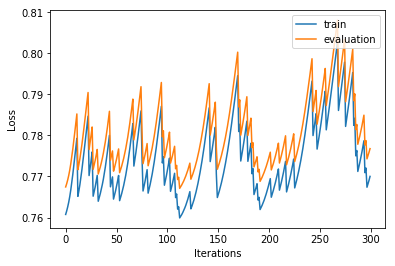

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot( train_loss, label="train")
plt.plot( evaluation_loss,label="evaluation" )
plt.legend(loc="upper right")


## 6.使用不同的优化方法更新模型参数

### NAG

In [8]:
train_loss_nag,evaluation_loss_nag,train_accr_nag,evaluation_accr_nag = [],[],[],[]
theta = np.ones((n, 1))

def NAG(w):
    vt = 0
    gama = 0.9

    for i in range(maxIteration):
        gradient = getStochasticGradient(w -gama*vt)
        vt = gama*vt + learning_rate * gradient
        w = w - vt
        
        train_loss_nag.append(getHingeLoss(w,train_X,train_y))
        evaluation_loss_nag.append( getHingeLoss(w,test_X,test_y))

        
NAG(theta)
print(min(evaluation_loss_nag))

0.763822922757


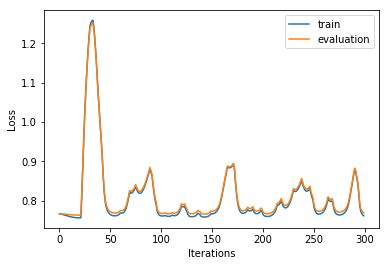

In [9]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_loss_nag, label="train")
plt.plot(evaluation_loss_nag,label="evaluation" )
plt.legend(loc ='upper right')


 ### RMSProp

In [11]:
train_loss_RMSProp,evaluation_loss_RMSProp,train_accr_RMSProp,evaluation_accr_RMSProp = [],[],[],[]
theta = np.ones((n, 1))

def RMSProp(w):
    gama = 0.9
    vt = 0
    Egt = 0
    e=0.00000001  
    
    learning_rate = 0.3

    for i in range(0, maxIteration):
        gradient = getStochasticGradient(w - gama*vt)
        Egt = gama * Egt + ((1-gama)*(gradient**2)).sum()  
        w -= learning_rate*gradient/math.sqrt(Egt + e)  

        train_loss_RMSProp.append(getHingeLoss(w,train_X,train_y))
        evaluation_loss_RMSProp.append( getHingeLoss(w,test_X,test_y))
        
RMSProp(theta)
print(min(evaluation_loss_RMSProp))

0.763801828114


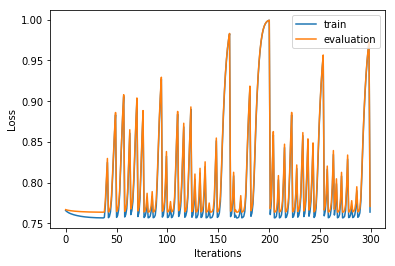

In [12]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_loss_RMSProp, label="train")
plt.plot(evaluation_loss_RMSProp,label="evaluation" )
plt.legend(loc ='upper right')


### AdaDelta

In [14]:
train_loss_adaDelta,evaluation_loss_adaDelta,train_accr_adaDelta,evaluation_accr_adaDelta = [],[],[],[]
theta = np.ones((n, 1))

def adaDelta(w):

    rho = 0.9
    Egt=0  
    Edt = 0  
    e=0.00000001  
    delta = 0  
    learning_rate = 2000

    for i in range(0, maxIteration):
        
        gradient = getStochasticGradient(w)
        Egt = rho * Egt + ((1-rho)*(gradient**2) ).sum()  
        delta = - math.sqrt(Edt + e)*gradient/math.sqrt(Egt + e)
        Edt =rho*Edt+( (1-rho)*(delta**2) ).sum()  
        w = w + learning_rate*delta 
        
        train_loss_adaDelta.append(getHingeLoss(w,train_X,train_y))
        evaluation_loss_adaDelta.append( getHingeLoss(w,test_X,test_y))
        
adaDelta(theta)
print(min(evaluation_loss_adaDelta))

0.763807229843


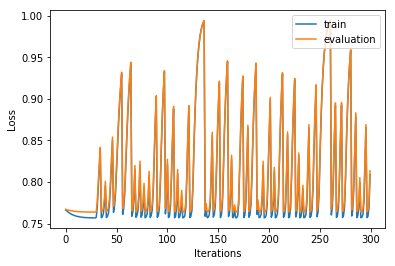

In [15]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_loss_adaDelta, label="train")
plt.plot(evaluation_loss_adaDelta,label="evaluation" )
plt.legend(loc ='upper right')


### Adam

In [16]:
train_loss_adam,evaluation_loss_adam,train_accr_adam,evaluation_accr_adam = [],[],[],[]
theta = np.ones((n, 1))

def adam(w):
 
    t = 0 
    m = 0  
    v = 0  
    b1 = 0.9  
    b2 = 0.995  
    learning_rate = 0.05
    
    for i in range(0, maxIteration):
        
        gradient = getStochasticGradient(w)
        t +=1 
        m = b1*m + ((1-b1)*gradient).sum() 
        v = b2*v + ((1-b2)*(gradient**2)).sum()  
        mt = m/(1-(b1**t))  
        vt = v/(1-(b2**t)) 
        w = w- learning_rate * mt/(math.sqrt(vt)+e) 
        
        train_loss_adam.append(getHingeLoss(w,train_X,train_y))
        evaluation_loss_adam.append( getHingeLoss(w,test_X,test_y))
        
adam(theta)
print(min(evaluation_loss_adam))

0.763805383034


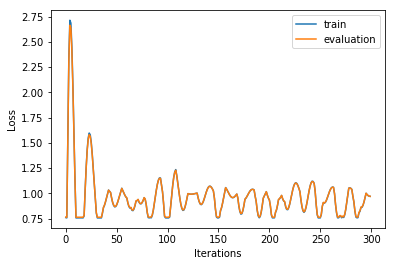

In [13]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(train_loss_adam, label="train")
plt.plot(evaluation_loss_adam,label="evaluation" )
plt.legend(loc ='upper right')


## 五种不同随机梯度下降方法对比

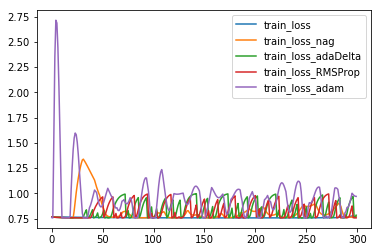

In [14]:
plt.plot(train_loss, label="train_loss")
plt.plot(train_loss_nag, label="train_loss_nag")
plt.plot(train_loss_adaDelta, label="train_loss_adaDelta")
plt.plot(train_loss_RMSProp, label ="train_loss_RMSProp")
plt.plot(train_loss_adam, label="train_loss_adam")
plt.legend(loc="upper right")